# Implementing the k-Means clustering algorithm
<hr/>

## 1. Introduction
### 1.1 What is clustering?
Clustering is the process in which data points is divided into groups. These groups have the following properties:

1. Elements in the <b>same group are closely related</b> to each other; they have similar properties.
2. Elements in <b>different groups are not closely related</b>; they have different properties

### 1.2 Types of clustering
Clustering can be of 3 types

1. Exclusive : A datapoint is <b>only allocated to one cluster</b>. Also called as hard clustering.
2. Overlapping : A datapoint can <b>belong to more than one cluster</b>. Also called as soft clustering.
3. Heirachial : Uses either a <b>top-down or bottom-up approach</b> to clustering.

### 1.3 <i>k</i>-Means clustering algorithm
The <i>k</i>-means clustering algorithm is an algorithm in which the dataset is divided into <i>k</i> groups(clusters). These clusters are determined by the distance from the centroid of the group. 

Since no pre-existing labels are given about the dataset, <i>k</i>-means clustering is an <b>unsupervised learning</b> algorithm.

## 2. Understanding the procedure
The program is based on finding <i>k</i> centroids, each centroid allocated to one group. Initially, the centroids are selected as random, the distance to each point to the centroid is found and its alloted the color of the nearest centroid. The centroids are then recalculated, the points again alloted the color of the nearest centroid, and the entire process is repeated.

## 3. Implementing the program

### 3.1 Importing the required modules
The following modules are required for this program

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy

%matplotlib inline

### 3.2 Initialising the data and selecting the centroids

Our dataset is stored in a dataframe using pandas, and all values are inside a 80x80 grid. We also find 3 centroids, which are selected as random. 

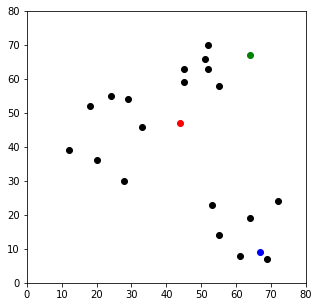

In [2]:
df = pd.DataFrame(
    {'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
     'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
    })

np.random.seed(0)
k = 3

centroids = {i+1 : [np.random.randint(0, 80), np.random.randint(0, 80)]
                for i in range(k)}

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color = 'k')

colmap = {1: 'r', 2: 'g', 3: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
    
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

### 3.3 Assigning each point to its cluster

The distance from each point to the centroids are calculated. From these, the centroid nearest to each point is selected, and also given the point of that centroid.

    x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0  12  39        32.984845        59.059292        62.649820        1     r
1  20  36        26.400758        53.823787        54.203321        1     r
2  28  30        23.345235        51.623638        44.294469        1     r
3  18  52        26.476405        48.383882        65.192024        1     r
4  29  54        16.552945        37.336309        58.898217        1     r


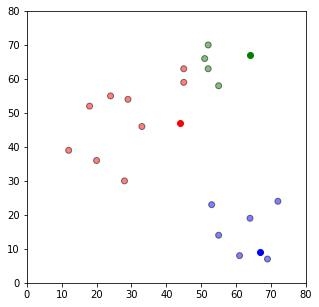

In [3]:
def assignment(df, centroids):
    for i in centroids.keys():
        df['distance_from_{}'.format(i)] = np.sqrt(
                                                (df['x']-centroids[i][0])**2 + (df['y']-centroids[i][1])**2
                                                    )
        
    centroid_distance_col = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_col].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

df = assignment(df, centroids)
print(df.head())

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')

for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
    
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

### 3.4 Finding the next centroid

After alloting the color of all the points, the new centroids are found and the colors are re-alloted again.

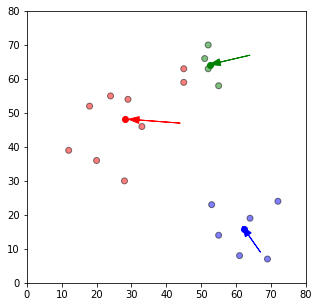

In [4]:
def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return k

old_centroids = copy.deepcopy(centroids)
centroids = update(centroids)

fig = plt.figure(figsize = (5, 5))
ax = plt.axes()

plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')

for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
    
plt.xlim(0, 80)
plt.ylim(0, 80)

for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    
    dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
    dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
    
    ax.arrow(old_x, old_y, dx, dy, head_width=2, head_length=3, fc=colmap[i], ec=colmap[i])
    
plt.show()

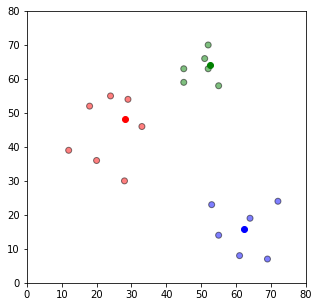

In [5]:
df = assignment(df, centroids)

plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')

for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
    
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

### 3.5 Final solution
Keep repeating the process till the points get alloted colors the same as the previous iteration.

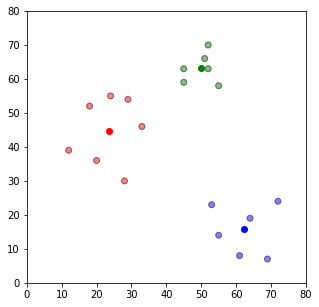

In [6]:
while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    
    if closest_centroids.equals(df['closest']):
        break
        
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')

for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
    
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

## 4. References

1. [Youtube : K Means Clustering Algorithm](https://www.youtube.com/watch?v=1XqG0kaJVHY)